In [1]:
# importing the required modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter("ignore")

In [2]:
# importing the dataset

df = pd.read_csv("train.csv")

In [3]:
# top 5 rows of the dataset

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
# all the unique values in each column

df.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

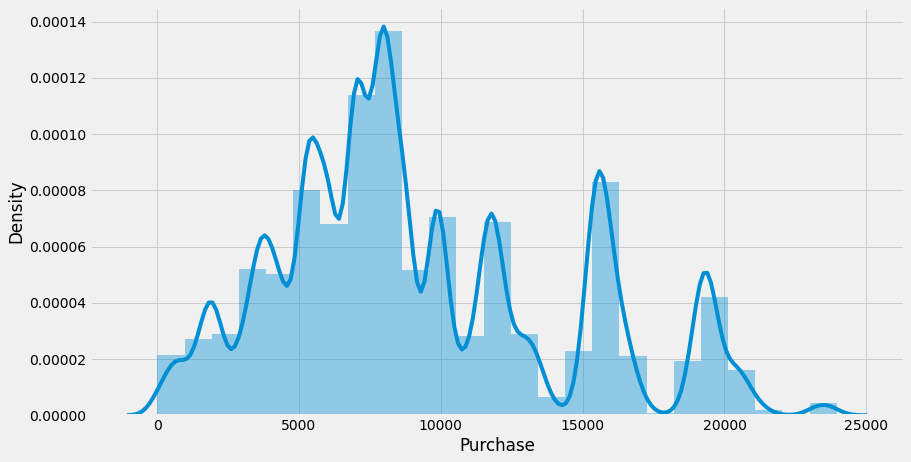

In [7]:
# density chart of the Purchase

plt.style.use("fivethirtyeight")
plt.figure(figsize= (13, 7))
sns.distplot(df["Purchase"], bins= 25)

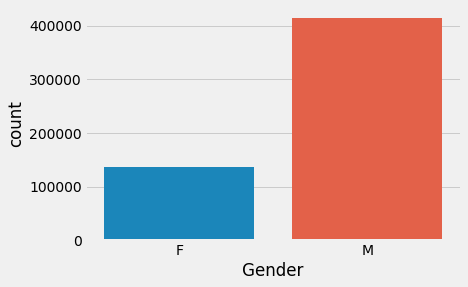

In [8]:
# counts of gender

sns.countplot(df["Gender"]);

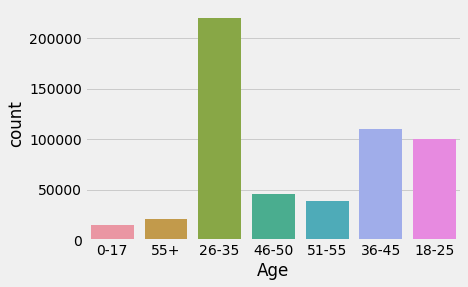

In [9]:
# number of people in different age category

sns.countplot(df["Age"]);

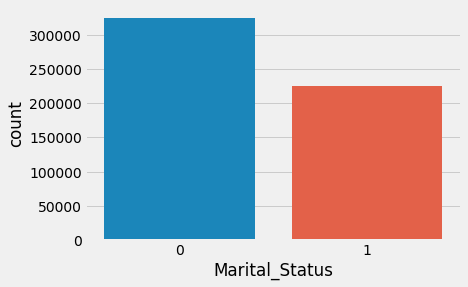

In [10]:
# marital status of people

sns.countplot(df["Marital_Status"]);

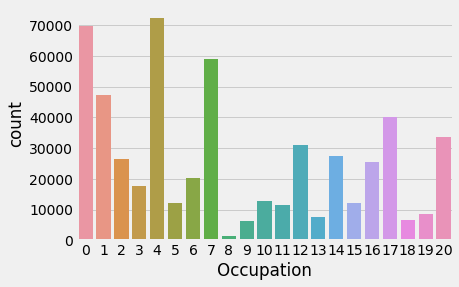

In [11]:
# different occupation category

sns.countplot(df["Occupation"]);

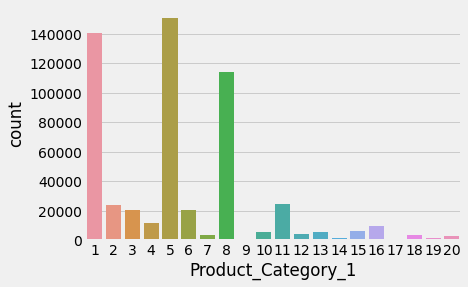

In [12]:
#number of times different amount of Product_Category_1 purchased

sns.countplot(df["Product_Category_1"]);

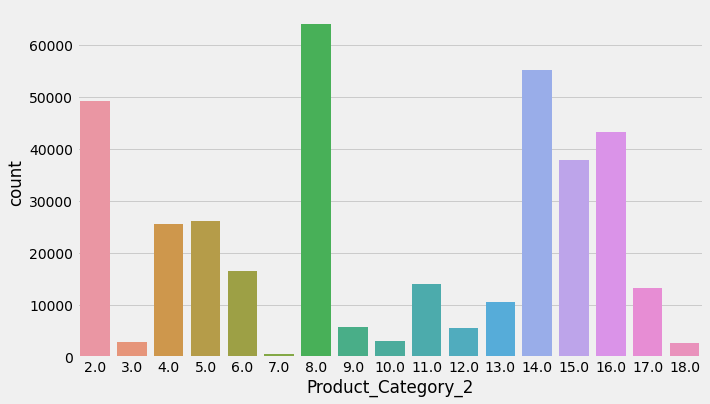

In [13]:
#number of times different amount of Product_Category_2 purchased
plt.figure(figsize= (10, 6))
sns.countplot(df["Product_Category_2"]);

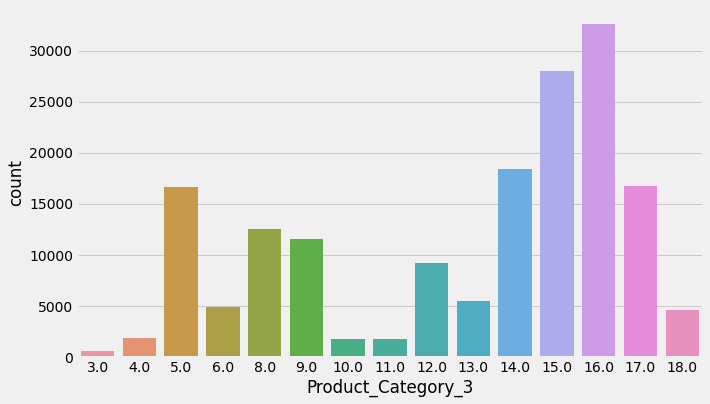

In [14]:
##number of times different amount of Product_Category_ purchased

plt.figure(figsize = (10, 6))
sns.countplot(df["Product_Category_3"]);

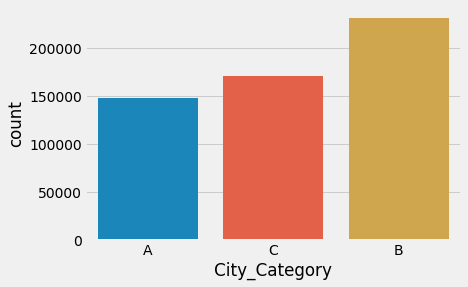

In [15]:
#product purchased in different cities

sns.countplot(df["City_Category"]);

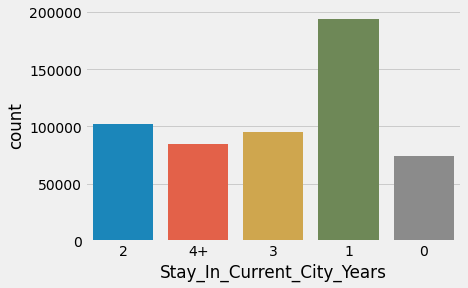

In [16]:
sns.countplot(df["Stay_In_Current_City_Years"]);

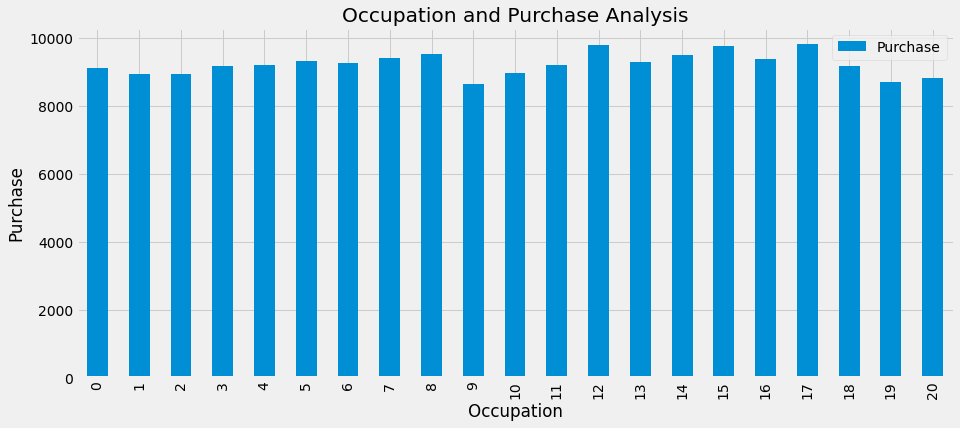

In [17]:
#Occupation and Purchase analysis

occupation_count = df.pivot_table(index= "Occupation", values= "Purchase", aggfunc= np.mean);
occupation_count.plot(kind= "bar", figsize= (14, 6));
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis");

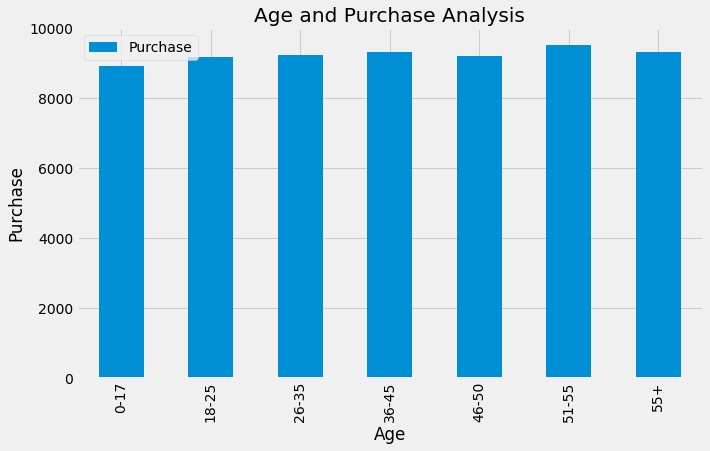

In [18]:
#Age and Purchase analysis

age_count = df.pivot_table(index= "Age", values= "Purchase", aggfunc= np.mean)
age_count.plot(kind= "bar", figsize= (10, 6))
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis");

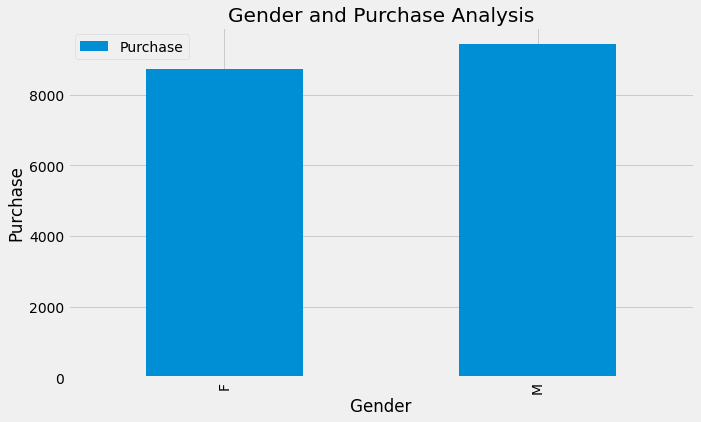

In [19]:
#Gender and Purchas analysis

gender_count = df.pivot_table(index= "Gender", values= "Purchase", aggfunc= np.mean)
gender_count.plot(kind= "bar", figsize= (10, 6))
plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis");

In [20]:
#Finding null values

df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [21]:
#Filling of the null values

df["Product_Category_2"] = df["Product_Category_2"].fillna(-2.0).astype("float32")

In [22]:
df["Product_Category_3"] = df["Product_Category_3"].fillna(-2.0).astype("float32")

In [23]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,-2.0,-2.0,7969


In [24]:
#Assigning F : 0 and M : 1 in the Gender feature

gender_dict = {"F" : 0, "M" : 1}
df["Gender"] = df["Gender"].apply(lambda x : gender_dict[x])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,-2.0,-2.0,7969


In [25]:
from sklearn.preprocessing import LabelEncoder
cols = ["Age", "City_Category", "Stay_In_Current_City_Years"]
le = LabelEncoder()

for col in cols:
  df[col] = le.fit_transform(df[col])

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,-2.0,-2.0,7969


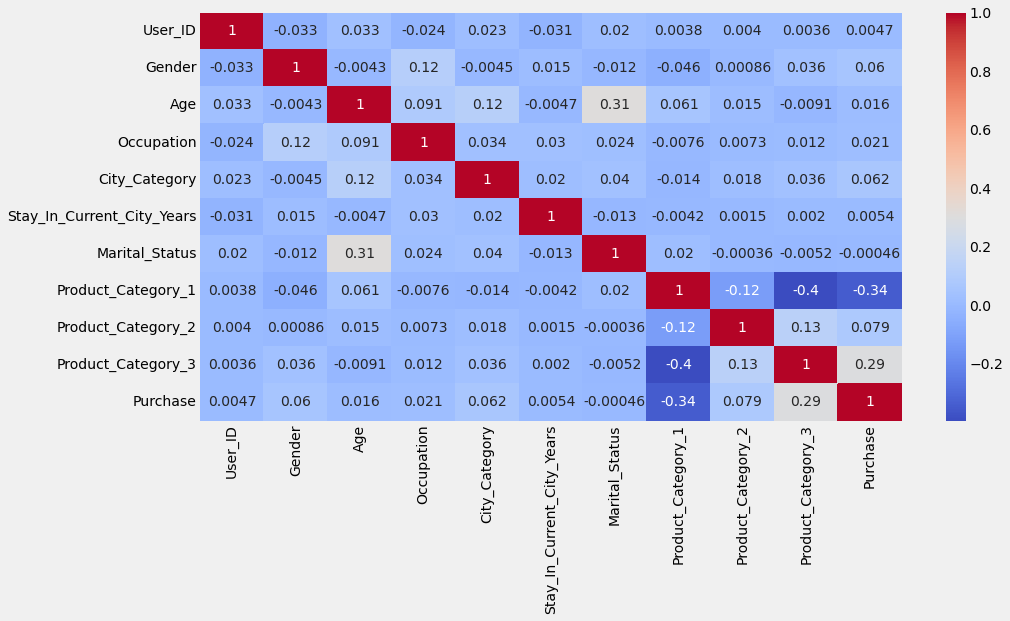

In [26]:
#Correlation table 

corr = df.corr()
plt.figure(figsize= (14, 7))
sns.heatmap(corr, annot= True, cmap= "coolwarm")

In [27]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,-2.0,-2.0,7969


In [28]:
#Assigning the features to X and label to y

X = df.drop(columns = ["User_ID", "Product_ID", "Purchase"])
y = df["Purchase"]

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [30]:
def train(model, X, y):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
  
  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  
  cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
  cv_score = np.abs(np.mean(cv_score))
    
  print("Results")
  print("MSE:", np.sqrt(mean_squared_error(y_test, pred)))
  print("CV Score:", np.sqrt(cv_score))
  print("R2 Score for Linear Regression using SKlearn:", r2_score(y_test, pred))

Results
MSE: 4610.944883173867
CV Score: 4625.252945835687
R2 Score for Linear Regression using SKlearn: 0.15586853657090594


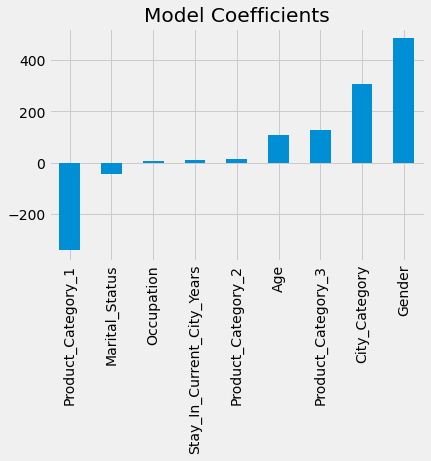

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize=True)
train(model, X, y)

coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients');

In [32]:
#importing tensorflow

import tensorflow as tf

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [33]:
#making a neural network with 2 hidden layers. One having 25 nodes and other having 15

Model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 25, activation = "relu"),
    tf.keras.layers.Dense(units = 15, activation = "relu"),
    tf.keras.layers.Dense(units = 1, activation = "linear")
])

In [34]:
#using mean_absolute_error as a loss function for linear regression

Model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.mean_absolute_error
)

In [35]:
Model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
13752/13752 [==============================] - 25s 2ms/step - loss: 4155.2368
Epoch 2/10
13752/13752 [==============================] - 18s 1ms/step - loss: 3238.2964
Epoch 3/10
13752/13752 [==============================] - 19s 1ms/step - loss: 3084.6382
Epoch 4/10
13752/13752 [==============================] - 20s 1ms/step - loss: 3058.8672
Epoch 5/10
13752/13752 [==============================] - 18s 1ms/step - loss: 3018.5261
Epoch 6/10
13752/13752 [==============================] - 19s 1ms/step - loss: 2962.7393
Epoch 7/10
13752/13752 [==============================] - 18s 1ms/step - loss: 2937.3005
Epoch 8/10
13752/13752 [==============================] - 18s 1ms/step - loss: 2921.1216
Epoch 9/10
13752/13752 [==============================] - 19s 1ms/step - loss: 2903.6619
Epoch 10/10
13752/13752 [==============================] - 18s 1ms/step - loss: 2890.2285


In [36]:
#making the prediction

prediction = Model.predict(x_test)

3438/3438 [==============================] - 3s 915us/step


In [37]:
print("r_2 Score for Neural Network is", r2_score(y_test, prediction))

r_2 Score for Neural Network is 0.3204582741000399
